# <CENTER> Clustering for Toy&Games Data

# <CENTER> Read Libraries 

In [31]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

import warnings
warnings.filterwarnings("ignore")

# <CENTER> Read data

In [32]:
# Read data
file =r"E:\NIIT\Project\VS_file\T&G_Data.csv"
data_TG = pd.read_csv(file)

In [34]:
TG_data = data_TG.copy()

In [35]:
TG_data.dtypes

reviewerID       object
ProductID        object
reviewerName     object
overall         float64
Date             object
text             object
senti_score     float64
sentiment        object
title            object
price           float64
Category         object
Sub-category     object
also_buy          int64
dtype: object

# <CENTER> Converting data to TFIDF 

In [36]:
# Step 1: Text Data Preprocessing (TF-IDF)
tfidf_vectorizer=TfidfVectorizer(stop_words='english',
                                 max_df=0.99,
                                 min_df=0.01)
tfidf_matrix = tfidf_vectorizer.fit_transform(TG_data['text'])


In [37]:
tfidf_matrix.shape

(167597, 613)

In [38]:
# Convert TF-IDF matrix to an array
tfidf_array = tfidf_matrix.toarray()

# Standardizing the data 

In [39]:
# Step 2: Numerical Data Preprocessing (Standardization)
numerical_data = TG_data[['senti_score', 'price', 'overall']]
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(numerical_data)
# Combine TF-IDF array and Scaled Numerical Data
combined_data = pd.concat([pd.DataFrame(tfidf_array), pd.DataFrame(scaled_numerical_data)], axis=1)

In [40]:
combined_data.head()

,0,1,2,3,4,5,6,7,8,9,...,606,607,608,609,610,611,612,0,1,2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,-1.335737,-0.338705,0.647905
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.679367,-0.338705,-0.358639
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,-0.040313,-0.338705,0.647905
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.17949,0.0,0.0,0.0,0.0,0.0,0.0,1.709309,-0.338705,0.647905
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1.351068,-0.338705,-0.358639


# <CENTER> Elbow Chart

### An elbow chart is a graphical representation used in data analysis and machine learning to help identify the optimal number of clusters in a dataset.

In [41]:
# Calculate the inertia value for each K to represent the cost
inertia = []
k_values = range(1, 11)
for k in k_values:
    km = KMeans(n_clusters=k, max_iter=100)
    km.fit(combined_data)
    inertia.append(km.inertia_)

c:\Users\Rishabh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rishabh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rishabh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rishabh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 


Optimal Value of K = 4



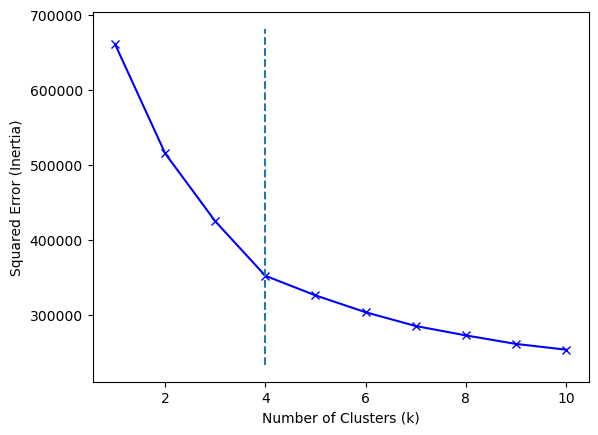

In [42]:
# Use Kneedle algorithm to calculate the best K
kn = KneeLocator(k_values, inertia, curve='convex', direction='decreasing')
optimal_k = kn.knee
print('\nOptimal Value of K = {}\n'.format(optimal_k))

# Plot the cost against K values and mark the optimal K
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Squared Error (Inertia)')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles= 'dashed')
plt.show()

In [43]:
# Build model and form clusters 
model = KMeans(n_clusters=optimal_k,max_iter=1000)
clusters = model.fit(combined_data)

print("Labels",clusters.labels_)
print("Centroids",clusters.cluster_centers_)

c:\Users\Rishabh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Labels [1 3 1 ... 0 0 0]
Centroids [[ 1.12816951e-02  8.29357217e-03  8.52079807e-03 ...  8.56731908e-03
   3.46957237e+00  1.80561829e-01]
 [ 8.15019747e-03  5.15643925e-03  4.95596744e-03 ... -4.95192078e-01
  -1.51464821e-01  2.95011920e-01]
 [ 8.05673298e-03  2.64002777e-03  3.88533469e-03 ... -7.87581276e-01
  -1.26352918e-01 -1.96478505e+00]
 [ 7.20769555e-03  6.92583831e-03  4.72301660e-03 ...  1.02517980e+00
  -1.87289447e-01  4.68199320e-01]]


Cluster to column

In [44]:
# Link each cluster to the customer record 
TG_data['cluster'] = clusters.fit_predict(combined_data) 

TG_data.cluster.value_counts()

c:\Users\Rishabh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2    77218
0    57140
1    25887
3     7352
Name: cluster, dtype: int64

Naming cluster 

In [45]:
cluster_names = {
    0: 'Cluster A',
    1: 'Cluster B',
    2: 'Cluster C',
    3: 'Cluster D'
    # Add more cluster names as needed
}

# Replace numerical cluster values with cluster names
TG_data['cluster_names'] = TG_data['cluster'].replace(cluster_names)


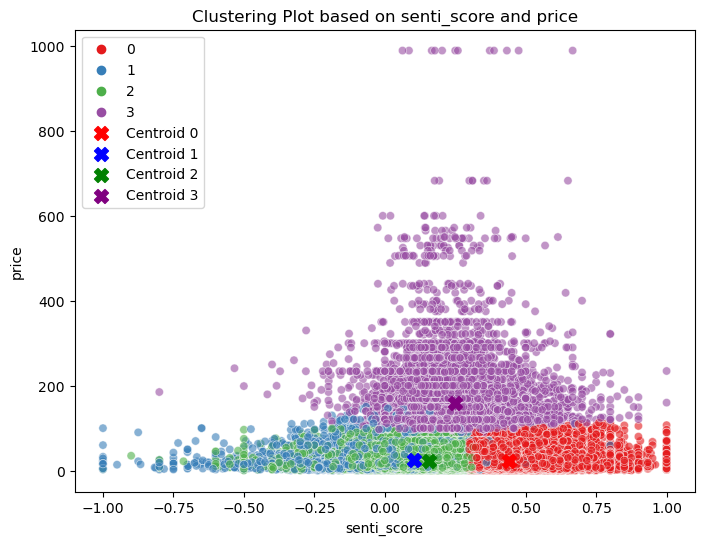

In [46]:
plt.figure(figsize=(8, 6))

# Choose a different palette for data points, for example, "Set1" with 4 colors
data_palette = sns.color_palette("Set1", n_colors=4)

# Scatter plot of data points
sns.scatterplot(x='senti_score', y='price', hue='cluster', data=TG_data, palette=data_palette, alpha=0.6)
plt.title('Clustering Plot based on senti_score and price')
plt.xlabel('senti_score')
plt.ylabel('price')

# Calculate cluster centroids
centroids = TG_data.groupby('cluster')[['senti_score', 'price']].mean().reset_index()

# Define a list of colors for centroids (one for each cluster)
centroid_colors = ["red", "blue", "green", "purple"]  # Customize the colors as needed

# Plot cluster centroids with different colors
for i, color in enumerate(centroid_colors):
    cluster_centroid = centroids[centroids['cluster'] == i]
    plt.scatter(cluster_centroid['senti_score'], cluster_centroid['price'], marker='X', s=100, color=color, label=f'Centroid {i}')
    
plt.legend()
plt.show()

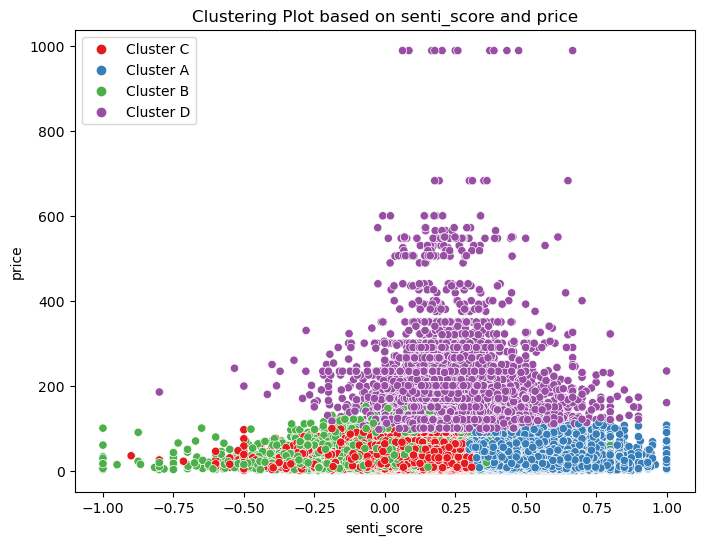

In [47]:
plt.figure(figsize=(8, 6))

# Choose a different palette for data points, for example, "Set1" with 4 colors
data_palette = sns.color_palette("Set1", n_colors=4)

# Scatter plot of data points using the 'cluster_names' column for coloring
sns.scatterplot(x='senti_score', y='price', hue='cluster_names', data=TG_data, palette=data_palette)
plt.title('Clustering Plot based on senti_score and price')
plt.xlabel('senti_score')
plt.ylabel('price')

plt.legend(loc='upper left')
plt.show()

Cluster C comprises the majority of unsatisfied customers.

# Finding the count for each clusters

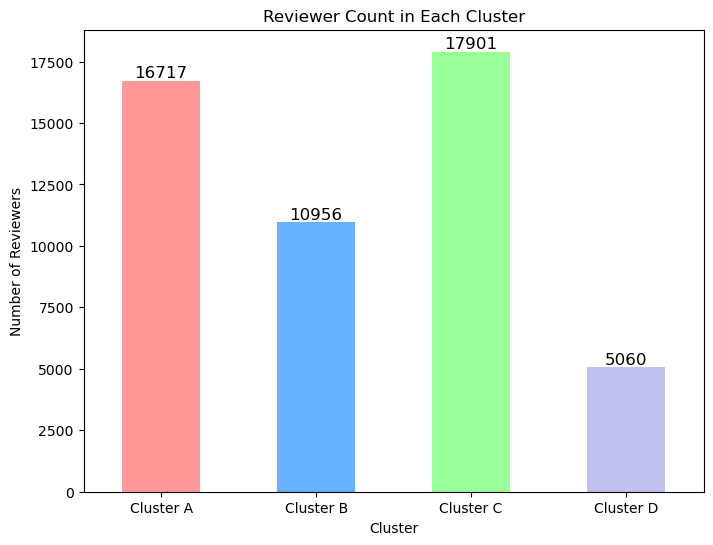

In [48]:
# Group the data by cluster and count the number of unique reviewer IDs in each cluster
cluster_counts = TG_data.groupby('cluster_names')['reviewerID'].nunique()

# Define a palette with lighter colors
colors = ['#FF9999', '#66B2FF', '#99FF99', '#C2C2F0']
# Create a bar graph
plt.figure(figsize=(8, 6))
ax = cluster_counts.plot(kind='bar', color=colors)
plt.title('Reviewer Count in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Reviewers')
plt.xticks(rotation=0)

# Annotate each bar with its count
for i, count in enumerate(cluster_counts):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=12, color='black')

plt.show()

In [70]:
# Filter the DataFrame to select rows belonging to the selected cluster
cluster_data = TG_data[TG_data['cluster'] == 2][['reviewerID','reviewerName','title']]
cluster_data.sample(5)

,reviewerID,reviewerName,title
111868,A31U1L2S2ROAXU,Tnsharing,MGA Lalaloopsy Littles Doll - Bundles Snuggle ...
130914,A1T5QRX0VIJFZ0,KynleighsMom,LeapFrog Olivia Learning Game (Works with Leap...
23754,A1HKWPX0S5FSZ0,bigshopper,Wits &amp; Wagers
29920,AJPJG42Z3WGVG,Jon Davis,Radio Flyer Excursion Wagon
100784,ARTSSZHO3ZYYR,R. Billings,Connect 4 Launchers


Above is the sample of reviewers which are found to be unsatisfied.

# <CENTER> Clustering for Video Games Data

In [50]:
# Read data
file1 =r"E:\NIIT\Project\VS_file\VG_Data.csv"
data_VG = pd.read_csv(file1)

In [51]:
data_VG.isnull().sum()

ProductID        0
price            0
Category         0
Sub-category     0
also_buy         0
reviewerID       0
reviewerName    14
overall          0
Date             0
text             0
senti_score      0
sentiment        0
dtype: int64

In [52]:
VG_data = data_VG.copy()

In [53]:
# Step 1: Text Data Preprocessing (TF-IDF)
tfidf_vectorizer=TfidfVectorizer(stop_words='english',
                                 max_df=0.99,
                                 min_df=0.01)
tfidf_matrix = tfidf_vectorizer.fit_transform(VG_data['text'])

In [54]:
tfidf_matrix.shape

(231780, 1229)

In [55]:
# Convert TF-IDF matrix to an array
tfidf_array = tfidf_matrix.toarray()

In [56]:
# Step 2: Numerical Data Preprocessing (Standardization)
numerical_data = VG_data[['senti_score', 'price', 'overall']]
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(numerical_data)
# Combine TF-IDF array and Scaled Numerical Data
combined_data = pd.concat([pd.DataFrame(tfidf_array), pd.DataFrame(scaled_numerical_data)], axis=1)

In [57]:
# Calculate the inertia value for each K to represent the cost
inertia = []
k_values = range(1, 11)
for k in k_values:
    km = KMeans(n_clusters=k, max_iter=100)
    km.fit(combined_data)
    inertia.append(km.inertia_)

c:\Users\Rishabh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rishabh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rishabh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rishabh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 


Optimal Value of K = 4



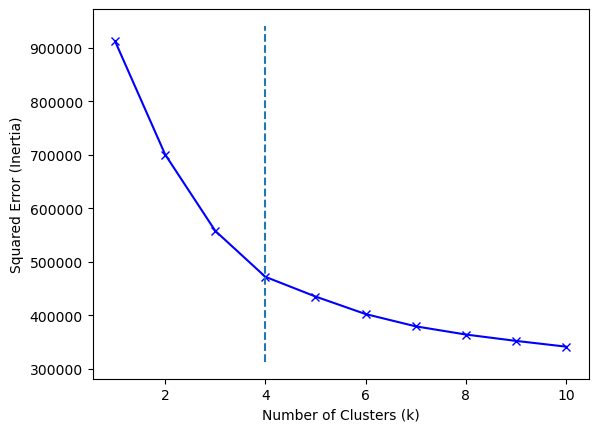

In [58]:
# Use Kneedle algorithm to calculate the best K
kn = KneeLocator(k_values, inertia, curve='convex', direction='decreasing')
optimal_k = kn.knee
print('\nOptimal Value of K = {}\n'.format(optimal_k))

# Plot the cost against K values and mark the optimal K
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Squared Error (Inertia)')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles= 'dashed')
plt.show()

In [59]:
# Build model and form clusters 
model = KMeans(n_clusters=optimal_k,max_iter=1000)
clusters = model.fit(combined_data)

print("Labels",clusters.labels_)
print("Centroids",clusters.cluster_centers_)

c:\Users\Rishabh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Labels [1 2 1 ... 2 2 2]
Centroids [[ 6.92862668e-03  7.41862201e-03  4.47116185e-03 ... -2.43501311e-01
  -1.80897041e-01  4.57859096e-01]
 [ 5.10782896e-03  8.08879603e-03  4.45617335e-03 ... -7.16572651e-01
  -1.90250568e-01 -1.56279447e+00]
 [ 4.33830197e-03  7.38026318e-03  4.36333119e-03 ...  1.63585584e-01
   3.58211949e+00  2.65154544e-01]
 [ 2.57248116e-03  6.29057278e-03  4.07373241e-03 ...  1.34802122e+00
  -1.59753939e-01  5.22034327e-01]]


In [60]:
# Link each cluster to the customer record 
VG_data['cluster'] = clusters.fit_predict(combined_data) 

VG_data.cluster.value_counts()

c:\Users\Rishabh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


3    119352
1     53005
0     48421
2     11002
Name: cluster, dtype: int64

# Clustering on the basis of centroid

c:\Users\Rishabh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


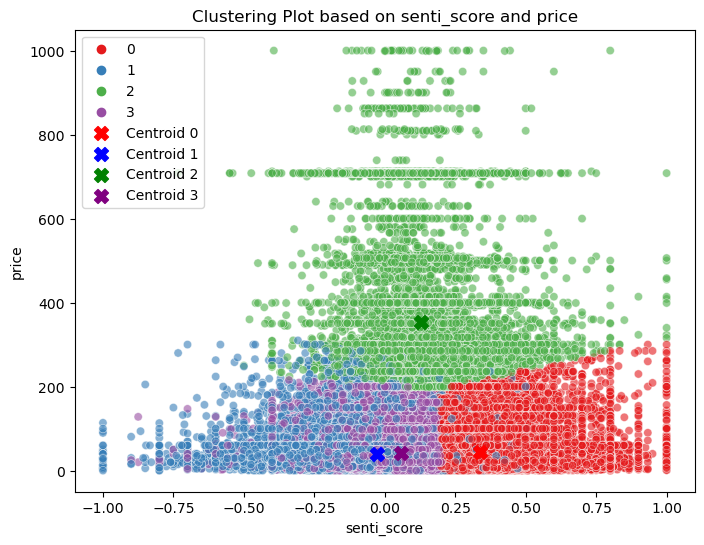

In [61]:
plt.figure(figsize=(8, 6))

# Choose a different palette for data points, for example, "Set1" with 4 colors
data_palette = sns.color_palette("Set1", n_colors=4)

# Scatter plot of data points
sns.scatterplot(x='senti_score', y='price', hue='cluster', data=VG_data, palette=data_palette, alpha=0.6)
plt.title('Clustering Plot based on senti_score and price')
plt.xlabel('senti_score')
plt.ylabel('price')

# Calculate cluster centroids
centroids = VG_data.groupby('cluster')[['senti_score', 'price']].mean().reset_index()

# Define a list of colors for centroids (one for each cluster)
centroid_colors = ["red", "blue", "green", "purple"]  # Customize the colors as needed

# Plot cluster centroids with different colors
for i, color in enumerate(centroid_colors):
    cluster_centroid = centroids[centroids['cluster'] == i]
    plt.scatter(cluster_centroid['senti_score'], cluster_centroid['price'], marker='X', s=100, color=color, label=f'Centroid {i}')
    
plt.legend()
plt.show()

Cluster centroids are calculated and plotted as distinct markers ('X') with different colors on the scatter plot. These centroids represent the center of each cluster in the feature space defined by the 'senti_score' and 'price' columns.

In [62]:
cluster_names = {
    0: 'Cluster A',
    1: 'Cluster B',
    2: 'Cluster C',
    3: 'Cluster D'
    # Add more cluster names as needed
}

# Replace numerical cluster values with cluster names
VG_data['cluster_names'] = VG_data['cluster'].replace(cluster_names)

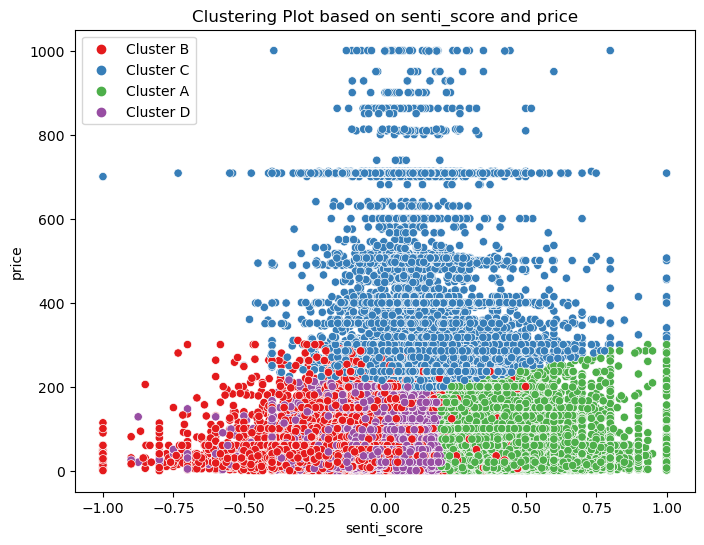

In [63]:
plt.figure(figsize=(8, 6))

# Choose a different palette for data points, for example, "Set1" with 4 colors
data_palette = sns.color_palette("Set1", n_colors=4)

# Scatter plot of data points using the 'cluster_names' column for coloring
sns.scatterplot(x='senti_score', y='price', hue='cluster_names', data=VG_data, palette=data_palette)
plt.title('Clustering Plot based on senti_score and price')
plt.xlabel('senti_score')
plt.ylabel('price')

plt.legend(loc='upper left')
plt.show()

"Cluster B" comprises the majority of unsatisfied customers.

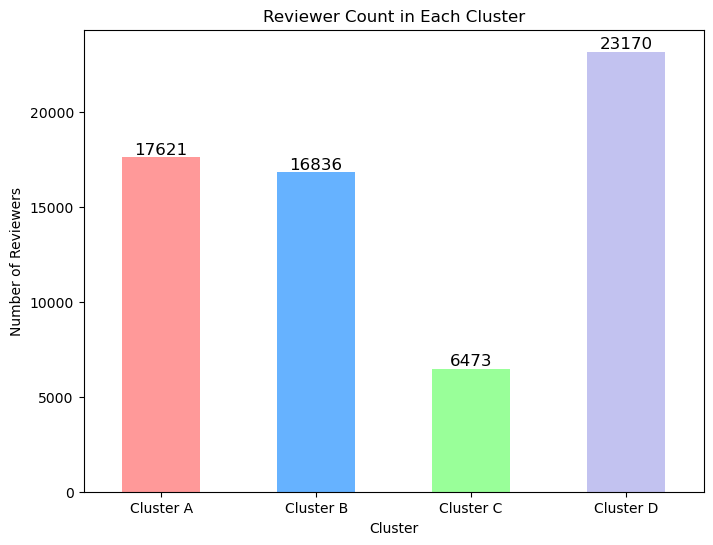

In [71]:
# Group the data by cluster and count the number of unique reviewer IDs in each cluster
cluster_counts = VG_data.groupby('cluster_names')['reviewerID'].nunique()

# Define a palette with lighter colors
colors = ['#FF9999', '#66B2FF', '#99FF99', '#C2C2F0']
# Create a bar graph
plt.figure(figsize=(8, 6))
ax = cluster_counts.plot(kind='bar', color=colors)
plt.title('Reviewer Count in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Reviewers')
plt.xticks(rotation=0)

# Annotate each bar with its count
for i, count in enumerate(cluster_counts):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=12, color='black')

plt.show()

In [80]:
# Filter the DataFrame to select rows belonging to the selected cluster
cluster_data = VG_data[VG_data['cluster'] ==1][['reviewerID','reviewerName']]
cluster_data.sample(5)

,reviewerID,reviewerName
59186,A29BQ6B90Y1R5F,S. Rhodes
110499,A2TKM3Y3BY3MEO,"Champion ""Kirby"""
113758,ANUXCX8I7HYN7,Evildead11
151804,A1ZPGBC06T8SMH,jesus christ
94050,A3K0ZJ4C2XGLCC,F. Rodriguez-Larrain


# Conclusion

## In clustering we performed customer segmentation and observed that clusters characterized by negative sentiment scores and lower pricing consist of the most dissatisfied customers, which could potentially result in customer churn.

## Work with the particular unsatisfied customers shown in clustering results above.

# ---------------------------